In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# given file path
dir = './test_data'
img_name = 'thermal_00001.jpeg'

In [80]:
from tensorflow.keras.models import load_model

# load model from the saved file
model = load_model('C:/Users/aaron/Documents/UWO/2024-2025/Term 2/AISE 4020/model.h5')
model.input_shape

(None, 200, 200, 1)

In [102]:
# get image
full_img = cv2.imread(os.path.join(dir,img_name), cv2.IMREAD_GRAYSCALE)
IMG_SHAPE = full_img.shape

# get x and y bounds
X_CUT = 3
Y_CUT = 3

x_bounds = []
y_bounds = []

for i in range(X_CUT):
    x_bounds.append((int(i*IMG_SHAPE[1]/X_CUT), int((i+1)*IMG_SHAPE[1]/X_CUT)))
for j in range(Y_CUT):
    y_bounds.append((int(j*IMG_SHAPE[0]/Y_CUT), int((j+1)*IMG_SHAPE[0]/Y_CUT)))

x_bounds, y_bounds

([(0, 213), (213, 426), (426, 640)], [(0, 170), (170, 341), (341, 512)])

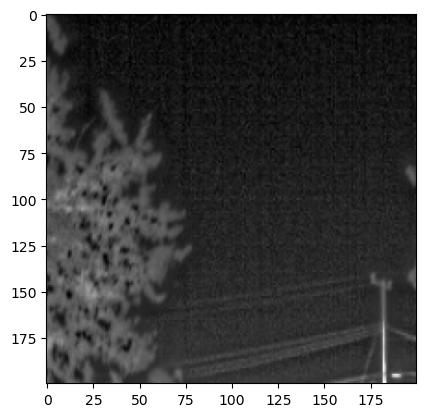

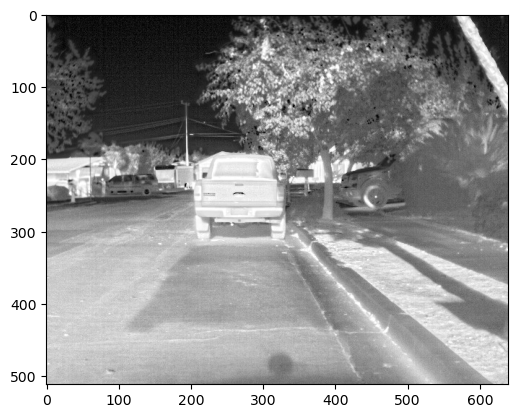

In [104]:
# cut image into quadrants
img_array = []
IMG_SIZE = model.input_shape[1]

for i in range(X_CUT):
    x_bb = x_bounds[i]
    for j in range(Y_CUT):
        y_bb = y_bounds[j]

        # split image and save into img_array
        cropped_img = full_img[y_bb[0]:y_bb[1], x_bb[0]:x_bb[1]]

        cropped_img_2 = cv2.resize(cropped_img, (IMG_SIZE, IMG_SIZE))
        
        img_array.append(cropped_img_2)

# show
plt.imshow(img_array[0], cmap="gray")
plt.show()
plt.imshow(full_img, cmap="gray")
plt.show()

In [105]:
# make testing set

X_test = np.array(img_array)
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)
X_test = X_test.astype('float32') / 255.0

In [99]:
X_test.shape

(21, 200, 200, 1)

In [100]:
model.input_shape

(None, 200, 200, 1)

In [107]:
# Now you can use the model for predictions or evaluation
y_pred = model.predict(X_test)
y_pred



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[0.3416676 , 0.32090053, 0.33743188],
       [0.36189997, 0.3037743 , 0.33432576],
       [0.36038086, 0.3012673 , 0.33835185],
       [0.35443434, 0.31570017, 0.32986546],
       [0.36304104, 0.2981297 , 0.33882925],
       [0.35216495, 0.30376142, 0.34407362],
       [0.3592018 , 0.31524545, 0.3255528 ],
       [0.34709445, 0.31227   , 0.34063557],
       [0.3636921 , 0.29592052, 0.34038734]], dtype=float32)

In [ ]:
y_pred